In [1]:
import pandas as pd
import numpy as np

In [2]:
data_extended1=pd.read_csv("/home/arkaprabham/Desktop/de4.csv")

In [3]:
data_extended1.set_index("Unnamed: 0",inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_extended1.iloc[:,0:7],data_extended1.iloc[:,7], test_size=0.40)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
y_pred=[]
for i in range(15):
    classifier = KNeighborsClassifier(n_neighbors=(i+1))
    classifier.fit(X_train, y_train)
    y_pred.append(classifier.predict(X_test))

In [6]:
print('Accuracy of kNN regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of kNN regression classifier on test set: 0.63


In [7]:
y_pred

[array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 1, 1, 0]),
 array([0, 0, 1, ..., 1, 0, 0]),
 array([0, 1, 1, ..., 1, 1, 0]),
 array([0, 0, 1, ..., 1, 0, 0]),
 array([0, 0, 1, ..., 1, 1, 0]),
 array([0, 0, 1, ..., 1, 1, 0]),
 array([0, 1, 1, ..., 1, 1, 0]),
 array([0, 0, 1, ..., 1, 1, 0]),
 array([0, 0, 1, ..., 1, 1, 0]),
 array([0, 0, 1, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 0, 1, 0]),
 array([0, 0, 1, ..., 1, 1, 0])]

In [8]:
from sklearn.metrics import confusion_matrix
list_cm=[]
for i in range(13):
    cm=confusion_matrix(y_test, y_pred[i])
    det=(cm[0,0]+cm[1,1])-(cm[0,1]+cm[1,0])
    list_cm.append(cm)
print(cm,det)

[[322 223]
 [214 410]] 295


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred[13]))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       545
           1       0.67      0.61      0.64       624

   micro avg       0.63      0.63      0.63      1169
   macro avg       0.63      0.63      0.63      1169
weighted avg       0.63      0.63      0.63      1169



In [10]:
import seaborn as sn
sn.heatmap(list_cm[12], annot=True)

In [11]:
actual=y_test
predictions= y_pred[13]

In [12]:
#np.shape(data_extended2)

In [13]:
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
mse

0.369546621043627

In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(actual,predictions)

0.369546621043627

In [15]:
from sklearn.linear_model import LogisticRegression as LR
clf = LR(random_state=0).fit(X_train, y_train)
y_pred1=clf.predict(X_test)
cm_lr=confusion_matrix(y_test, y_pred1)
clf.score(X_test, y_test)

/home/arkaprabham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.93071000855432

In [16]:
err=[]
for i in range(45):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    err.append(mean_squared_error(actual,predictions))

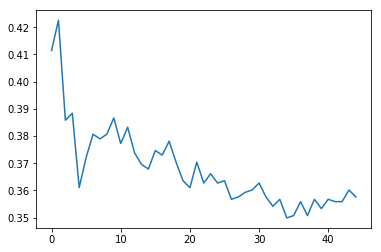

In [17]:
import matplotlib.pyplot as plt
plt.plot(list(range(45)),err)

In [18]:
print('Accuracy of kNN regression classifier on test set: {:.2f}'.format(clf.score(X_test,predictions)))

Accuracy of kNN regression classifier on test set: 0.66


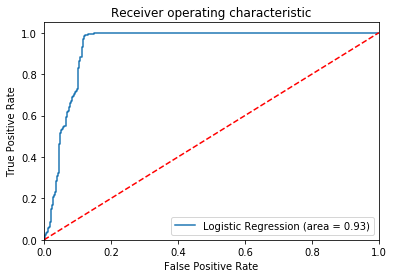

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype(float), y_pred1.astype(float))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf.score(X_test, y_test))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred1)
cm1

array([[480,  65],
       [ 16, 608]])

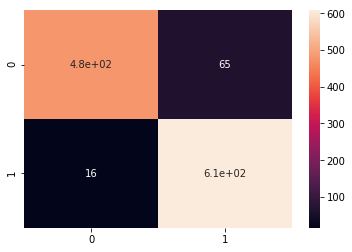

In [21]:
import seaborn as sn
sn.heatmap(cm1, annot=True)

In [22]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('Accuracy of kNN regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of kNN regression classifier on test set: 0.63


In [23]:
prob=classifier.predict_proba(X_test)
prob1 = pd.DataFrame(data=prob[:,0])
prob2 = pd.DataFrame(data=prob[:,1])
prob2.head()

,0
0,0.333333
1,0.466667
2,0.866667
3,0.266667
4,0.266667


In [24]:
prob1.to_csv("/home/arkaprabham/Desktop/knnprob_de4_0.csv")

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       545
           1       0.90      0.97      0.94       624

   micro avg       0.93      0.93      0.93      1169
   macro avg       0.94      0.93      0.93      1169
weighted avg       0.93      0.93      0.93      1169



In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60       545
           1       0.65      0.66      0.66       624

   micro avg       0.63      0.63      0.63      1169
   macro avg       0.63      0.63      0.63      1169
weighted avg       0.63      0.63      0.63      1169




# Hybrid A

In [27]:
prob_df=pd.read_csv("/home/arkaprabham/Desktop/lr_prob1.csv")

In [28]:
prob_df.set_index("Unnamed: 0",inplace=True)
np.shape(prob_df)

(1169, 4)

In [29]:
R_LR1=[]
R_LR2=[]
for i in range(1169):
    dicti={}
    dicti[prob_df.iloc[i,0]]='S1'
    dicti[prob_df.iloc[i,1]]='S2'
    dicti[prob_df.iloc[i,2]]='S3'
    dicti[prob_df.iloc[i,3]]='S4'
    a=sorted(prob_df.iloc[i,:])
    R_LR1.append(dicti[a[3]])
    R_LR2.append(dicti[a[2]])

In [30]:
lR=pd.DataFrame({'R_LR1':R_LR1 , 'R_LR2':R_LR2})

In [31]:
knn0=pd.read_csv("/home/arkaprabham/Desktop/knnprob_de1_0.csv")
knn1=pd.read_csv("/home/arkaprabham/Desktop/knnprob_de1_1.csv")

In [32]:
R_kb=[]
for i in range(1169):
    dicti={}
    dicti[knn1.iloc[i,0]]='S1'
    dicti[knn1.iloc[i,1]]='S2'
    dicti[knn1.iloc[i,2]]='S3'
    dicti[knn1.iloc[i,3]]='S4'
    b=sorted(knn1.iloc[i,:])
    R_kb.append(dicti[b[3]]) #max of zero prob

In [33]:
R_ka=[]
for i in range(1169):
    dicti={}
    dicti[knn0.iloc[i,0]]='S1'
    dicti[knn0.iloc[i,1]]='S2'
    dicti[knn0.iloc[i,2]]='S3'
    dicti[knn0.iloc[i,3]]='S4'
    b=sorted(knn0.iloc[i,:])
    R_ka.append(dicti[b[3]]) #max of one prob

In [34]:
kNN=pd.DataFrame({'R_ka':R_ka , 'R_kb':R_kb})
kNN

,R_ka,R_kb
0,S1,S3
1,S2,S3
2,S1,S4
3,S4,S3
4,S3,S4
5,S1,S4
6,S4,S3
7,S1,S3
8,S4,S3
9,S1,S3


In [35]:
#lR ,kNN
Selected=[]
for i in range(1169):
    if lR.iloc[i,0] == kNN.iloc[i,1]:
        Selected.append(kNN.iloc[i,0])
    else:
        Selected.append(lR.iloc[i,0])

X=[x for x in range(1169)]
pd.DataFrame({'Order':X , 'Selected supplier':Selected})

,Order,Selected supplier
0,0,S1
1,1,S2
2,2,S3
3,3,S1
4,4,S3
5,5,S3
6,6,S1
7,7,S1
8,8,S2
9,9,S4


# Hybrid B

In [42]:
acc_a=[]
for i in range(1169):
    acc_a.append(max(sorted(knn0.iloc[i,:])))
    
acc_b=[]
for i in range(1169):
    acc_b.append(max(sorted(knn1.iloc[i,:])))

In [45]:
from sklearn import metrics
selected_hyA=[]
for i in range(1169):
    if metrics.auc(fpr, tpr)>=acc_a[i]:
        if metrics.auc(fpr, tpr)>=acc_b[i]:
            selected_hyA.append(lR.iloc[i,0])
        else:
            if kNN.iloc[i,1] == lR.iloc[i,0]:
                selected_hyA.append(lR.iloc[i,1])
            else:
                selected_hyA.append(lR.iloc[i,0])
    else:
        if metrics.auc(fpr, tpr) >= acc_b[i]:
            if kNN.iloc[i,0]==kNN.iloc[i,1]:
                if kNN.iloc[i,0] == lR.iloc[i,0]:
                    selected_hyA.append(lR.iloc[i,1])
                else:
                    selected_hyA.append(lR.iloc[i,0])
            else:
                selected_hyA.append(kNN.iloc[i,0])
        else:
                selected_hyA.append(kNN.iloc[i,0])

In [46]:
order=[x for x in range(1169)]
pd.DataFrame({'Order':order , 'Selected': selected_hyA})

,Order,Selected
0,0,S3
1,1,S2
2,2,S3
3,3,S1
4,4,S3
5,5,S3
6,6,S1
7,7,S3
8,8,S2
9,9,S1
